for concept : 
https://github.com/ujjwal-basnet/LLM-FROM-Scratch/blob/main/Numerical%20Look%20at%20LlamaIndex%3A%20Step-by-Step.ipynb

In [117]:
# step 1 
import os 
import llama_index
import numpy as np
from llama_index.core import StorageContext
from llama_index.vector_stores.deeplake import DeepLakeVectorStore

# step two create a data folder containing , info.txt 
data / 

    info.txt
    
        my name is ujjwal basnet 
        i am from nepal 
        i love cooding 



In [118]:
## load data and build the index

from llama_index.core import VectorStoreIndex, SimpleDirectoryReader 

#load documents form the 'data' directory
document= SimpleDirectoryReader(r"projects/data").load_data()

DEBUG:llama_index.core.readers.file.base:> [SimpleDirectoryReader] Total files added: 1
> [SimpleDirectoryReader] Total files added: 1
DEBUG:fsspec.local:open file: d:/ujjwal/Building-LLMs-for-Production/projects/data/info.txt
open file: d:/ujjwal/Building-LLMs-for-Production/projects/data/info.txt


In [119]:
document

[Document(id_='b4bf53e3-74ad-4f8c-acee-051e5e8a24ae', embedding=None, metadata={'file_path': 'd:\\ujjwal\\Building-LLMs-for-Production\\projects\\data\\info.txt', 'file_name': 'info.txt', 'file_type': 'text/plain', 'file_size': 64, 'creation_date': '2025-07-14', 'last_modified_date': '2025-07-15'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='my name is ujjwal basnet \r\ni am from nepal \r\ni love cooding \r\n\r\n', path=None, url=None, mimetype=None), image_resource=None, audio_resource=None, video_resource=None, text_template='{metadata_str}\n\n{content}')]

In [120]:
## local model
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import Settings

Settings.embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)


INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
DEBUG:urllib3.connectionpool:Resetting dropped connection: huggingface.co
Resetting dropped connection: huggingface.co
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /BAAI/bge-small-en-v1.5/resolve/main/modules.json HTTP/1.1" 307 0
https://huggingface.co:443 "HEAD /BAAI/bge-small-en-v1.5/resolve/main/modules.json HTTP/1.1" 307 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /api/resolve-cache/models/BAAI/bge-small-en-v1.5/5c38ec7c405ec4b44b94cc5a9bb96e735b38267a/modules.json HTTP/1.1" 200 0
https://huggingface.co:443 "HEAD /api/resolve-cache/models/BAAI/bge-small-en-v1.5/5c38ec7c405ec4b44b94cc5a9bb96e735b38267a/modules.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /BAAI/bge-small-en-v1.5/resolve/main/config_sentence_transformers.json HTTP/1.1" 307 0
https

In [121]:
## VectorStoreIndex.from_documents automatically chunks long text into nodes, embeds each chunk, and stores them. ✅

index = VectorStoreIndex.from_documents(document, show_progress= True) 

Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: my name is ujjwal basnet 
i am from nepal 
i ...
> Adding chunk: my name is ujjwal basnet 
i am from nepal 
i ...


Generating embeddings:   0%|          | 0/1 [00:00<?, ?it/s]

In [122]:
index._embed_model 

HuggingFaceEmbedding(model_name='BAAI/bge-small-en-v1.5', embed_batch_size=10, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x0000024AF1853F90>, num_workers=None, embeddings_cache=None, max_length=512, normalize=True, query_instruction=None, text_instruction=None, cache_folder=None, show_progress_bar=False)

In [123]:
## customizing llm 
## llama index use openai by defult 
from llama_index.llms.groq import Groq 

from dotenv import load_dotenv
load_dotenv() 
import os 

api= os.getenv('groq_key')

llm = Groq(model="llama3-70b-8192", api_key=api)

In [124]:
## step 5 , creaet a query engine 
query_engine= index.as_query_engine(llm= llm)

In [125]:
## now we can ask question about our documents
response = query_engine.query("what is my name")
response.response

DEBUG:llama_index.core.indices.utils:> Top 1 nodes:
> [Node 004f008b-e8ee-4460-b9e6-59ce09c1930d] [Similarity score:             0.646056] my name is ujjwal basnet 
i am from nepal 
i love cooding
> Top 1 nodes:
> [Node 004f008b-e8ee-4460-b9e6-59ce09c1930d] [Similarity score:             0.646056] my name is ujjwal basnet 
i am from nepal 
i love cooding
DEBUG:openai._base_client:Request options: {'method': 'post', 'url': '/chat/completions', 'files': None, 'idempotency_key': 'stainless-python-retry-723269aa-6dd1-431a-8e8a-93b513b3fb56', 'json_data': {'messages': [{'role': 'system', 'content': "You are an expert Q&A system that is trusted around the world.\nAlways answer the query using the provided context information, and not prior knowledge.\nSome rules to follow:\n1. Never directly reference the given context in your answer.\n2. Avoid statements like 'Based on the context, ...' or 'The context information ...' or anything along those lines."}, {'role': 'user', 'content': 'Context i

'Your name is ujjwal basnet.'

In [126]:
# without index
print(llm.complete("what is my name").text)

DEBUG:openai._base_client:Request options: {'method': 'post', 'url': '/chat/completions', 'files': None, 'idempotency_key': 'stainless-python-retry-7b8f00c2-fcec-4927-bfc0-15b4509b29e9', 'json_data': {'messages': [{'role': 'user', 'content': 'what is my name'}], 'model': 'llama3-70b-8192', 'stream': False, 'temperature': 0.1}}
Request options: {'method': 'post', 'url': '/chat/completions', 'files': None, 'idempotency_key': 'stainless-python-retry-7b8f00c2-fcec-4927-bfc0-15b4509b29e9', 'json_data': {'messages': [{'role': 'user', 'content': 'what is my name'}], 'model': 'llama3-70b-8192', 'stream': False, 'temperature': 0.1}}
DEBUG:openai._base_client:Sending HTTP Request: POST https://api.groq.com/openai/v1/chat/completions
Sending HTTP Request: POST https://api.groq.com/openai/v1/chat/completions
DEBUG:httpcore.http11:send_request_headers.started request=<Request [b'POST']>
send_request_headers.started request=<Request [b'POST']>
DEBUG:httpcore.http11:send_request_headers.complete
send

## another

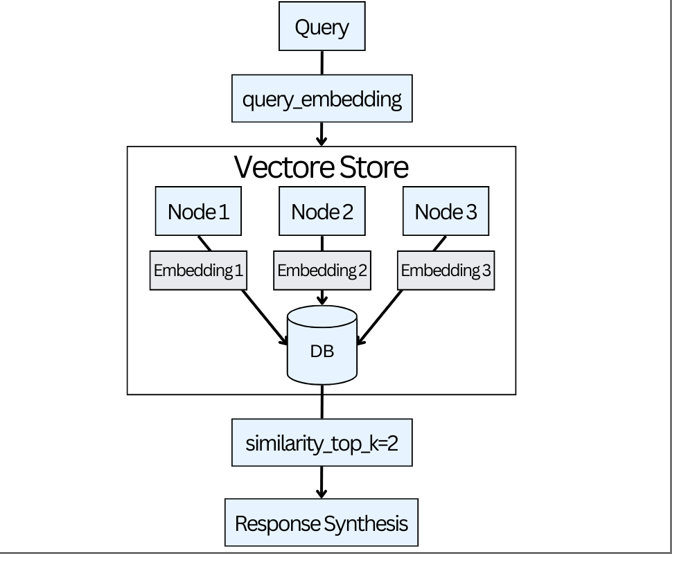

In [127]:
from IPython.display import Image
Image(data ='vector_store_index.png' )

Indices
LlamaIndex is proficient in indexing and searching through diverse data formats, including documents, PDFs, and database queries. Indexing represents a foundational step in data storage within a database. This process involves transforming unstructured data into embeddings that capture semantic meanings. This transformation optimizes the data format, facilitating easy access and querying.
LlamaIndex offers various index types, each designed to fulfill a different purpose.


Vector Store Index
The Vector Store Index generates embeddings during index construction to identify the top-k most similar nodes in response to a query.
It’s suitable for small-scale applications and easily scalable to accommodate larger datasets using high-performance vector databases.


In [128]:
# data connector 
## connects data from different souces 
## like if their is pdf, imgaes,  viedo in local then it converts to docuemnts type which will be easy for rag 



In [129]:
import logging 
import sys 

In [130]:
logging.basicConfig(stream= sys.stdout , level = logging.DEBUG)
logging.getLogger().addHandler(hdlr= logging.StreamHandler(stream= sys.stdout))

In [131]:
from llama_index.readers.wikipedia import WikipediaReader


In [132]:
# Ensure you have the required library
# pip install llama-index

from llama_index.readers.wikipedia import WikipediaReader

# Instantiate the reader
loader = WikipediaReader()

# Load documents for the given Wikipedia pages
documents = loader.load_data(pages=["Artificial_intelligence", 'Nepal_national_cricket_team'])

# Check how many documents were loaded
print(len(documents))


DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): en.wikipedia.org:80
Starting new HTTP connection (1): en.wikipedia.org:80
Starting new HTTP connection (1): en.wikipedia.org:80
DEBUG:urllib3.connectionpool:http://en.wikipedia.org:80 "GET /w/api.php?prop=info%7Cpageprops&inprop=url&ppprop=disambiguation&redirects=&titles=Artificial+intelligence&format=json&action=query HTTP/1.1" 301 0
http://en.wikipedia.org:80 "GET /w/api.php?prop=info%7Cpageprops&inprop=url&ppprop=disambiguation&redirects=&titles=Artificial+intelligence&format=json&action=query HTTP/1.1" 301 0
http://en.wikipedia.org:80 "GET /w/api.php?prop=info%7Cpageprops&inprop=url&ppprop=disambiguation&redirects=&titles=Artificial+intelligence&format=json&action=query HTTP/1.1" 301 0
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): en.wikipedia.org:443
Starting new HTTPS connection (1): en.wikipedia.org:443
Starting new HTTPS connection (1): en.wikipedia.org:443
DEBUG:urllib3.connectionpool:https://en.

In [133]:
print(len(documents))

2


In [134]:
documents

[Document(id_='1164', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tool

In [135]:
len(documents[0].text) # total lenght of the text 

87950

In [136]:
len(documents[1].text) # total lenght of the text 

54692

### NOdes (chunking ) 
#### i love nepal , my name is ujjwal basnet 
#### node 1 = i love nepal 
#### node 2 = my name is ujjwal basnet 

In [137]:
from llama_index.core.node_parser import SimpleNodeParser

In [138]:
parser= SimpleNodeParser.from_defaults(chunk_size= 512, chunk_overlap= 20)
parser

SentenceSplitter(include_metadata=True, include_prev_next_rel=True, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x0000024B6366A1D0>, id_func=<function default_id_func at 0x0000024AB1F03420>, chunk_size=512, chunk_overlap=20, separator=' ', paragraph_separator='\n\n\n', secondary_chunking_regex='[^,.;。？！]+[,.;。？！]?|[,.;。？！]')

In [139]:
nodes = parser.get_nodes_from_documents(documents)
nodes

DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: Artificial intelligence (AI) is the capability ...
> Adding chunk: Artificial intelligence (AI) is the capability ...
> Adding chunk: Artificial intelligence (AI) is the capability ...
DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: == Goals ==
The general problem of simulating (...
> Adding chunk: == Goals ==
The general problem of simulating (...
> Adding chunk: == Goals ==
The general problem of simulating (...
DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: === Planning and decision-making ===
An "agent"...
> Adding chunk: === Planning and decision-making ===
An "agent"...
> Adding chunk: === Planning and decision-making ===
An "agent"...
DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: === Learning ===
Machine learning is the study ...
> Adding chunk: === Learning ===
Machine learning is the study ...
> Adding chunk: === Learning ===
Machine learning is the study ...
DEBUG:llama_

[TextNode(id_='d9f10ebf-7347-42e6-9260-0985045ea528', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='1164', node_type=<ObjectType.DOCUMENT: '4'>, metadata={}, hash='a9580d464f675e5cbe89a7c1b6869d88a67b215b03a3c0cdd6e75794f2d24b36'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='84c9e607-3dcd-4259-ac8f-1d8b8c4bc430', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='f9601e18e360cfa9304487a5cf3c79a5fb4876e92ef6fa45d81dc312c21a769c')}, metadata_template='{key}: {value}', metadata_separator='\n', text='Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use 

In [140]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

# loads https://huggingface.co/BAAI/bge-small-en-v1.5
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /BAAI/bge-small-en-v1.5/resolve/main/modules.json HTTP/1.1" 307 0
https://huggingface.co:443 "HEAD /BAAI/bge-small-en-v1.5/resolve/main/modules.json HTTP/1.1" 307 0
https://huggingface.co:443 "HEAD /BAAI/bge-small-en-v1.5/resolve/main/modules.json HTTP/1.1" 307 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /api/resolve-cache/models/BAAI/bge-small-en-v1.5/5c38ec7c405ec4b44b94cc5a9bb96e735b38267a/modules.json HTTP/1.1" 200 0
https://huggingface.co:443 "HEAD /api/resolve-cache/models/BAAI/bge-small-en-v1.5/5c38ec7c405ec4b44b94cc5a9bb96e735b38267a/modules.json HTTP/1.1" 200 0
https://huggingface.co:443 "HEAD /api/resolve-cache/models/BAAI/bge-small-en-v1.5/5c38ec7c405ec4b44b94cc5a9bb96e73

In [141]:
nodes

[TextNode(id_='d9f10ebf-7347-42e6-9260-0985045ea528', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='1164', node_type=<ObjectType.DOCUMENT: '4'>, metadata={}, hash='a9580d464f675e5cbe89a7c1b6869d88a67b215b03a3c0cdd6e75794f2d24b36'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='84c9e607-3dcd-4259-ac8f-1d8b8c4bc430', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='f9601e18e360cfa9304487a5cf3c79a5fb4876e92ef6fa45d81dc312c21a769c')}, metadata_template='{key}: {value}', metadata_separator='\n', text='Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use 

In [142]:
for node in nodes:
    node.embedding = np.array(embed_model.get_text_embedding(node.get_content()), dtype=np.float32)


In [143]:
os.environ['ACTIVELOOP_TOKEN'] = os.getenv('Aloop')


In [144]:
my_activeloop_org_id = "ujjwalbasnet"
my_activeloop_dataset_name = "LlamaIndex_intro"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"


In [145]:
## create an index over documents
vector_store= DeepLakeVectorStore(dataset_path= dataset_path , overwrite= False)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): app.activeloop.ai:443
Starting new HTTPS connection (1): app.activeloop.ai:443
Starting new HTTPS connection (1): app.activeloop.ai:443
DEBUG:urllib3.connectionpool:https://app.activeloop.ai:443 "GET /api/user/profile HTTP/1.1" 200 None
https://app.activeloop.ai:443 "GET /api/user/profile HTTP/1.1" 200 None
https://app.activeloop.ai:443 "GET /api/user/profile HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): app.activeloop.ai:443
Starting new HTTPS connection (1): app.activeloop.ai:443
Starting new HTTPS connection (1): app.activeloop.ai:443
DEBUG:urllib3.connectionpool:https://app.activeloop.ai:443 "GET /api/org/ujjwalbasnet/ds/LlamaIndex_intro/creds?mode=r&no_cache=False&db_engine=%7B%22enabled%22%3A+false%7D HTTP/1.1" 200 None
https://app.activeloop.ai:443 "GET /api/org/ujjwalbasnet/ds/LlamaIndex_intro/creds?mode=r&no_cache=False&db_engine=%7B%22enabled%22%3A+false%7D HTTP/1.1" 200 None


In [146]:
storage_context = StorageContext.from_defaults(vector_store=vector_store)
index= VectorStoreIndex.from_documents(documents, storage_context= storage_context)


DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: Artificial intelligence (AI) is the capability ...
> Adding chunk: Artificial intelligence (AI) is the capability ...
> Adding chunk: Artificial intelligence (AI) is the capability ...
DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: === Planning and decision-making ===
An "agent"...
> Adding chunk: === Planning and decision-making ===
An "agent"...
> Adding chunk: === Planning and decision-making ===
An "agent"...
DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: === Perception ===
Machine perception is the ab...
> Adding chunk: === Perception ===
Machine perception is the ab...
> Adding chunk: === Perception ===
Machine perception is the ab...
DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: === Probabilistic methods for uncertain reasoni...
> Adding chunk: === Probabilistic methods for uncertain reasoni...
> Adding chunk: === Probabilistic methods for uncertain reasoni...
DEBUG:llama_

  0%|          | 0/40 [00:00<?, ?it/s]

DEBUG:botocore.hooks:Event before-parameter-build.s3.GetObject: calling handler <function sse_md5 at 0x0000024AB5F8BB00>
Event before-parameter-build.s3.GetObject: calling handler <function sse_md5 at 0x0000024AB5F8BB00>
Event before-parameter-build.s3.GetObject: calling handler <function sse_md5 at 0x0000024AB5F8BB00>
DEBUG:botocore.hooks:Event before-parameter-build.s3.GetObject: calling handler <function validate_bucket_name at 0x0000024AB5F8BA60>
Event before-parameter-build.s3.GetObject: calling handler <function validate_bucket_name at 0x0000024AB5F8BA60>
Event before-parameter-build.s3.GetObject: calling handler <function validate_bucket_name at 0x0000024AB5F8BA60>
DEBUG:botocore.hooks:Event before-parameter-build.s3.GetObject: calling handler <function remove_bucket_from_url_paths_from_model at 0x0000024AB5FB1D00>
Event before-parameter-build.s3.GetObject: calling handler <function remove_bucket_from_url_paths_from_model at 0x0000024AB5FB1D00>
Event before-parameter-build.s3.Ge

100%|██████████| 40/40 [00:05<00:00,  6.79it/s]

DEBUG:botocore.hooks:Event before-parameter-build.s3.GetObject: calling handler <function sse_md5 at 0x0000024AB5F8BB00>
Event before-parameter-build.s3.GetObject: calling handler <function sse_md5 at 0x0000024AB5F8BB00>
Event before-parameter-build.s3.GetObject: calling handler <function sse_md5 at 0x0000024AB5F8BB00>
DEBUG:botocore.hooks:Event before-parameter-build.s3.GetObject: calling handler <function validate_bucket_name at 0x0000024AB5F8BA60>
Event before-parameter-build.s3.GetObject: calling handler <function validate_bucket_name at 0x0000024AB5F8BA60>
Event before-parameter-build.s3.GetObject: calling handler <function validate_bucket_name at 0x0000024AB5F8BA60>
DEBUG:botocore.hooks:Event before-parameter-build.s3.GetObject: calling handler <function remove_bucket_from_url_paths_from_model at 0x0000024AB5FB1D00>
Event before-parameter-build.s3.GetObject: calling handler <function remove_bucket_from_url_paths_from_model at 0x0000024AB5FB1D00>
Event before-parameter-build.s3.Ge

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "GET /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/version_control_info.lock HTTP/1.1" 404 None
https://s3.us-east-1.wasabisys.com:443 "GET /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/version_control_info.lock HTTP/1.1" 404 None
https://s3.us-east-1.wasabisys.com:443 "GET /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/version_control_info.lock HTTP/1.1" 404 None
DEBUG:botocore.httpchecksum:Skipping checksum validation. Response did not contain one of the following algorithms: ['crc32', 'sha1', 'sha256'].
Skipping checksum validation. Response did not contain one of the following algorithms: ['crc32', 'sha1', 'sha256'].
Skipping checksum validation. Response did not contain one of the following algorithms: ['crc32', 'sha1', 'sha256'].
DEBUG:botocore.hooks:Event before-parse.s3.GetObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.GetObject: calling handler <f

/

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


|

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/tensor_meta.json HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/tensor_meta.json HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/tensor_meta.json HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObj

/

DEBUG:botocore.hooks:Event before-call.s3.PutObject: calling handler <function add_query_compatibility_header at 0x0000024AB5FB23E0>
Event before-call.s3.PutObject: calling handler <function add_query_compatibility_header at 0x0000024AB5FB23E0>
Event before-call.s3.PutObject: calling handler <function add_query_compatibility_header at 0x0000024AB5FB23E0>
DEBUG:botocore.hooks:Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
DEBUG:botocore.endpoint:Making request for OperationModel(name=PutObject) with params: {'url_path': '/protected/ujjwalbasnet/LlamaIndex_intro/metadata/tensor_meta.json', 'query_string': {}, 'method': 'PUT', 'headers': {'Content-Type': 'application/octet-stream', 'User-Ag

|

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


\

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/tensor_meta.json HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/tensor_meta.json HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/tensor_meta.json HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event befo

|

DEBUG:botocore.regions:Selecting from endpoint provider's list of auth schemes: "sigv4". User selected auth scheme is: "None"
Selecting from endpoint provider's list of auth schemes: "sigv4". User selected auth scheme is: "None"
Selecting from endpoint provider's list of auth schemes: "sigv4". User selected auth scheme is: "None"
DEBUG:botocore.regions:Selected auth type "v4" as "v4" with signing context params: {'region': 'us-east-1', 'signing_name': 's3', 'disableDoubleEncoding': True}
Selected auth type "v4" as "v4" with signing context params: {'region': 'us-east-1', 'signing_name': 's3', 'disableDoubleEncoding': True}
Selected auth type "v4" as "v4" with signing context params: {'region': 'us-east-1', 'signing_name': 's3', 'disableDoubleEncoding': True}
DEBUG:botocore.hooks:Event before-call.s3.PutObject: calling handler <function add_expect_header at 0x0000024AB5F8BE20>
Event before-call.s3.PutObject: calling handler <function add_expect_header at 0x0000024AB5F8BE20>
Event before

\

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


-

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/tensor_meta.json HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/tensor_meta.json HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/tensor_meta.json HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.

\

DEBUG:botocore.parsers:Response headers: {'Date': 'Tue, 15 Jul 2025 17:37:57 GMT', 'ETag': '"68e23c8447958e2983fd951302fcefbe"', 'Server': 'WasabiS3/7.23.4744-2025-06-12-4415a38b27', 'X-Amz-Checksum-Type': 'FULL_OBJECT', 'x-amz-checksum-crc32': 'HLhp6Q==', 'x-amz-id-2': 'ddQEe9JZsLXaqJ1kLHJW/Z0I+OhM60m2qA/rmy85aZgVaGctIFhuh2/YsJlB/MZzvh9XZqa4FPhV', 'x-amz-request-id': '744A099B4999D556:A', 'x-amz-version-id': '001752601077476051645-P7e3UJKJlz', 'x-wasabi-cm-reference-id': '1752601051472 38.27.106.119 ConID:5133210126/EngineConID:49794719/Core:40', 'Content-Length': '0'}
Response headers: {'Date': 'Tue, 15 Jul 2025 17:37:57 GMT', 'ETag': '"68e23c8447958e2983fd951302fcefbe"', 'Server': 'WasabiS3/7.23.4744-2025-06-12-4415a38b27', 'X-Amz-Checksum-Type': 'FULL_OBJECT', 'x-amz-checksum-crc32': 'HLhp6Q==', 'x-amz-id-2': 'ddQEe9JZsLXaqJ1kLHJW/Z0I+OhM60m2qA/rmy85aZgVaGctIFhuh2/YsJlB/MZzvh9XZqa4FPhV', 'x-amz-request-id': '744A099B4999D556:A', 'x-amz-version-id': '001752601077476051645-P7e3UJKJlz

-

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


-

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/chunks_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expire

\

Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
DEBUG:botocore.hooks:Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>
Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>
Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>
DEBUG:botocore.endpoint:Sending http request: <AWSPreparedRequest stream_output=False, method=PUT, url=https://s3.us-east-1.wasabisys.com/snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/tiles_index/unsharded, headers={'Content-Type': b'application/octet-stream', 'User-

-

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


/

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/tiles_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_h

-

Event before-parameter-build.s3.PutObject: calling handler <function sse_md5 at 0x0000024AB5F8BB00>
Event before-parameter-build.s3.PutObject: calling handler <function sse_md5 at 0x0000024AB5F8BB00>
DEBUG:botocore.hooks:Event before-parameter-build.s3.PutObject: calling handler <function convert_body_to_file_like_object at 0x0000024AB5FB1260>
Event before-parameter-build.s3.PutObject: calling handler <function convert_body_to_file_like_object at 0x0000024AB5FB1260>
Event before-parameter-build.s3.PutObject: calling handler <function convert_body_to_file_like_object at 0x0000024AB5FB1260>
DEBUG:botocore.hooks:Event before-parameter-build.s3.PutObject: calling handler <function validate_bucket_name at 0x0000024AB5F8BA60>
Event before-parameter-build.s3.PutObject: calling handler <function validate_bucket_name at 0x0000024AB5F8BA60>
Event before-parameter-build.s3.PutObject: calling handler <function validate_bucket_name at 0x0000024AB5F8BA60>
DEBUG:botocore.hooks:Event before-parameter-

/

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


/

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/chunks_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024

-

StringToSign:
AWS4-HMAC-SHA256
20250715T173800Z
20250715/us-east-1/s3/aws4_request
6c2d85bce187f6d225f8ef9df5d8924076cd265fc098e6907e4ad9cc41a745ed
StringToSign:
AWS4-HMAC-SHA256
20250715T173800Z
20250715/us-east-1/s3/aws4_request
6c2d85bce187f6d225f8ef9df5d8924076cd265fc098e6907e4ad9cc41a745ed
DEBUG:botocore.auth:Signature:
d0d8fc1ff55dbd12535fb2143a5eaaede18e1524c5bed6957d0c9200dc775398
Signature:
d0d8fc1ff55dbd12535fb2143a5eaaede18e1524c5bed6957d0c9200dc775398
Signature:
d0d8fc1ff55dbd12535fb2143a5eaaede18e1524c5bed6957d0c9200dc775398
DEBUG:botocore.hooks:Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
Event request-created.s3.PutObject: calling handler <

/

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


|

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/tiles_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5

/

StringToSign:
AWS4-HMAC-SHA256
20250715T173801Z
20250715/us-east-1/s3/aws4_request
7aa3005c745e79a993774da009459086b9c6bd85e35dfaee4e64f3268fe7c6b8
StringToSign:
AWS4-HMAC-SHA256
20250715T173801Z
20250715/us-east-1/s3/aws4_request
7aa3005c745e79a993774da009459086b9c6bd85e35dfaee4e64f3268fe7c6b8
DEBUG:botocore.auth:Signature:
c4bce0f121db1d4f4e0a99fe0a00070047b5d6c6ee2358a7e6ad570a65dcb86e
Signature:
c4bce0f121db1d4f4e0a99fe0a00070047b5d6c6ee2358a7e6ad570a65dcb86e
Signature:
c4bce0f121db1d4f4e0a99fe0a00070047b5d6c6ee2358a7e6ad570a65dcb86e
DEBUG:botocore.hooks:Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
Event request-created.s3.PutObject: calling handler <

|

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


\

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/chunks_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event befo

|

Event before-call.s3.PutObject: calling handler <function add_query_compatibility_header at 0x0000024AB5FB23E0>
Event before-call.s3.PutObject: calling handler <function add_query_compatibility_header at 0x0000024AB5FB23E0>
DEBUG:botocore.hooks:Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
DEBUG:botocore.endpoint:Making request for OperationModel(name=PutObject) with params: {'url_path': '/protected/ujjwalbasnet/LlamaIndex_intro/id/tiles_index/unsharded', 'query_string': {}, 'method': 'PUT', 'headers': {'Content-Type': 'application/octet-stream', 'User-Agent': 'Boto3/1.37.38 md/Botocore#1.37.38 ua/2.1 os/windows#10 md/arch#amd64 lang/python#3.11.8 md/pyimpl#CPython m/N cfg/retry-mode#le

\

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


-

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/tiles_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-

\

Selecting from endpoint provider's list of auth schemes: "sigv4". User selected auth scheme is: "None"
Selecting from endpoint provider's list of auth schemes: "sigv4". User selected auth scheme is: "None"
DEBUG:botocore.regions:Selected auth type "v4" as "v4" with signing context params: {'region': 'us-east-1', 'signing_name': 's3', 'disableDoubleEncoding': True}
Selected auth type "v4" as "v4" with signing context params: {'region': 'us-east-1', 'signing_name': 's3', 'disableDoubleEncoding': True}
Selected auth type "v4" as "v4" with signing context params: {'region': 'us-east-1', 'signing_name': 's3', 'disableDoubleEncoding': True}
DEBUG:botocore.hooks:Event before-call.s3.PutObject: calling handler <function add_expect_header at 0x0000024AB5F8BE20>
Event before-call.s3.PutObject: calling handler <function add_expect_header at 0x0000024AB5F8BE20>
Event before-call.s3.PutObject: calling handler <function add_expect_header at 0x0000024AB5F8BE20>
DEBUG:botocore.handlers:Adding expect 1

-

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


/

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/chunks_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>


-

DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
DEBUG:botocore.parsers:Response headers: {'Date': 'Tue, 15 Jul 2025 17:38:03 GMT', 'ETag': '"2116fcdad5938eac5df7c0b112d04bde"', 'Server': 'WasabiS3/7.23.4744-2025-06-12-4415a38b27', 'X-Amz-Checksum-Type': 'FULL_OBJECT', 'x-amz-checksum-crc32': '9nY/3Q==', 'x-amz-id-2': 'zoG3GGOIXon4tPF8XzG0FGmlbI0VJUTRbxM9EZBIPQk+riatG9pgHo4BuiAwNtGOmoBDSjWIvmKd', 'x-amz-request-id': '6DF95AB5B4FADB59:A', 'x-amz-version-id': '001752601083061200555-Q631AUDtZ_', 'x-wasabi-cm-reference-id': '1752601051472 38.27.106.119 ConID:5133210126/EngineConID:49794719/Core:40', 'Content-Length': '0'}
Response headers: {'Date': 'Tue, 15 Jul 2025 17:38:03 GMT', 'ETag': '"2116fcdad5938eac5df7

/

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


/

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/tiles_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2

-

Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
DEBUG:botocore.hooks:Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>
Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>
Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>
DEBUG:botocore.endpoint:Sending http request: <AWSPreparedRequest stream_output=False, method=PUT, url=https://s3.us-east-1.wasabisys.com/snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/chunks_index/unsharded, headers={'Content-Type': b'application/octet-stream', 'User-Agent': b'B

/

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


|

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/chunks_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/chunks_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Even

/

Event before-call.s3.PutObject: calling handler <function add_query_compatibility_header at 0x0000024AB5FB23E0>
Event before-call.s3.PutObject: calling handler <function add_query_compatibility_header at 0x0000024AB5FB23E0>
DEBUG:botocore.hooks:Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
DEBUG:botocore.endpoint:Making request for OperationModel(name=PutObject) with params: {'url_path': '/protected/ujjwalbasnet/LlamaIndex_intro/text/tiles_index/unsharded', 'query_string': {}, 'method': 'PUT', 'headers': {'Content-Type': 'application/octet-stream', 'User-Agent': 'Boto3/1.37.38 md/Botocore#1.37.38 ua/2.1 os/windows#10 md/arch#amd64 lang/python#3.11.8 md/pyimpl#CPython m/N cfg/retry-mode#

|

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


\

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/tiles_index/unsharded HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/tiles_index/unsharded HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event b

|

Event before-endpoint-resolution.s3: calling handler <function customize_endpoint_resolver_builtins at 0x0000024AB5FB1EE0>
DEBUG:botocore.hooks:Event before-endpoint-resolution.s3: calling handler <bound method S3RegionRedirectorv2.redirect_from_cache of <botocore.utils.S3RegionRedirectorv2 object at 0x0000024B4162A650>>
Event before-endpoint-resolution.s3: calling handler <bound method S3RegionRedirectorv2.redirect_from_cache of <botocore.utils.S3RegionRedirectorv2 object at 0x0000024B4162A650>>
Event before-endpoint-resolution.s3: calling handler <bound method S3RegionRedirectorv2.redirect_from_cache of <botocore.utils.S3RegionRedirectorv2 object at 0x0000024B4162A650>>
DEBUG:botocore.regions:Calling endpoint provider with parameters: {'Bucket': 'snark-hub', 'Region': 'us-east-1', 'UseFIPS': False, 'UseDualStack': False, 'Endpoint': 'https://s3.us-east-1.wasabisys.com', 'ForcePathStyle': True, 'Accelerate': False, 'UseGlobalEndpoint': True, 'Key': 'protected/ujjwalbasnet/LlamaIndex_i

\

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


-

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/commit_diff HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.

\

Event before-parameter-build.s3.PutObject: calling handler <bound method ClientCreator._inject_s3_input_parameters of <botocore.client.ClientCreator object at 0x0000024B4B009010>>
DEBUG:botocore.hooks:Event before-parameter-build.s3.PutObject: calling handler <function generate_idempotent_uuid at 0x0000024AB5F8B880>
Event before-parameter-build.s3.PutObject: calling handler <function generate_idempotent_uuid at 0x0000024AB5F8B880>
Event before-parameter-build.s3.PutObject: calling handler <function generate_idempotent_uuid at 0x0000024AB5F8B880>
DEBUG:botocore.hooks:Event before-parameter-build.s3.PutObject: calling handler <function _handle_request_validation_mode_member at 0x0000024AB5FB2480>
Event before-parameter-build.s3.PutObject: calling handler <function _handle_request_validation_mode_member at 0x0000024AB5FB2480>
Event before-parameter-build.s3.PutObject: calling handler <function _handle_request_validation_mode_member at 0x0000024AB5FB2480>
DEBUG:botocore.hooks:Event before-

-

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


-

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/commit_diff HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
E

/

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


/

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/commit_diff HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling ha

-

Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>
DEBUG:botocore.endpoint:Sending http request: <AWSPreparedRequest stream_output=False, method=PUT, url=https://s3.us-east-1.wasabisys.com/snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/commit_diff, headers={'Content-Type': b'application/octet-stream', 'User-Agent': b'Boto3/1.37.38 md/Botocore#1.37.38 ua/2.1 os/windows#10 md/arch#amd64 lang/python#3.11.8 md/pyimpl#CPython m/N cfg/retry-mode#legacy Botocore/1.37.38', 'Expect': b'100-continue', 'Transfer-Encoding': b'chunked', 'Content-Encoding': b'aws-chunked', 'X-Amz-Trailer': b'x-amz-checksum-crc32', 'X-Amz-Decoded-Content-Length': b'36', 'x-amz-sdk-checksum-algorithm': b'CRC32', 'X-Amz-Date': b'20250715T173808Z', 'X-Amz-Security-Token': b'0qBHH8UGC18ek8SC6_m6vF4pDvpUV22Of1fHWnQykyTYnsYfeR-tpdXSP6tbWzXdqa8CcicmDPSvMWuihkyoY68aFlw-LbfQPNGjscvTXUyu0cTjk6qKs3koGQlHY8P7RWvTcruJtXRrX676f5n4ELJNvQwKO5qGwy9ympg4JuiqAldGWnv766zYNA

/

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


|

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/commit_diff HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.Put

/

Waiting for 100 Continue response.


\

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


\

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/commit_diff HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/commit_diff HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: call

|

Signature:
5f844d1809c7ff1ac27280e43e82509eed2fa5887fe12845f3d035fe1da9e69a
DEBUG:botocore.hooks:Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
Event request-created.s3.PutObject: calling handler <bound method UserAgentString.rebuild_and_replace_user_agent_handler of <botocore.useragent.UserAgentString object at 0x0000024B41651890>>
DEBUG:botocore.hooks:Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>
Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>
Event request-created.s3.PutObject: calling handler <function add_retry_headers at 0x0000024AB5FB1C60>


\

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


/

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/chunks/b2712a5d7a4e4d77 HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/chunks/b2712a5d7a4e4d77 HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/embedding/chunks/b2712a5d7a4e4d77 HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000

-

Event before-call.s3.PutObject: calling handler <function add_query_compatibility_header at 0x0000024AB5FB23E0>
Event before-call.s3.PutObject: calling handler <function add_query_compatibility_header at 0x0000024AB5FB23E0>
DEBUG:botocore.hooks:Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
Event before-call.s3.PutObject: calling handler <function inject_api_version_header_if_needed at 0x0000024AB5FB13A0>
DEBUG:botocore.endpoint:Making request for OperationModel(name=PutObject) with params: {'url_path': '/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/chunks/2ba0b66aae4b4682', 'query_string': {}, 'method': 'PUT', 'headers': {'Content-Type': 'application/octet-stream', 'User-Agent': 'Boto3/1.37.38 md/Botocore#1.37.38 ua/2.1 os/windows#10 md/arch#amd64 lang/python#3.11.8 md/pyimpl#CPython m/N c

/

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


|

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/chunks/2ba0b66aae4b4682 HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/chunks/2ba0b66aae4b4682 HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/_embedding_shape/chunks/2ba0b66aae4b4682 HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_exp

/

Endpoint provider result: https://s3.us-east-1.wasabisys.com/snark-hub
Endpoint provider result: https://s3.us-east-1.wasabisys.com/snark-hub
DEBUG:botocore.regions:Selecting from endpoint provider's list of auth schemes: "sigv4". User selected auth scheme is: "None"
Selecting from endpoint provider's list of auth schemes: "sigv4". User selected auth scheme is: "None"
Selecting from endpoint provider's list of auth schemes: "sigv4". User selected auth scheme is: "None"
DEBUG:botocore.regions:Selected auth type "v4" as "v4" with signing context params: {'region': 'us-east-1', 'signing_name': 's3', 'disableDoubleEncoding': True}
Selected auth type "v4" as "v4" with signing context params: {'region': 'us-east-1', 'signing_name': 's3', 'disableDoubleEncoding': True}
Selected auth type "v4" as "v4" with signing context params: {'region': 'us-east-1', 'signing_name': 's3', 'disableDoubleEncoding': True}
DEBUG:botocore.hooks:Event before-call.s3.PutObject: calling handler <function add_expect

|

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


\

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/chunks/4a49df54b7d24c06 HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/chunks/4a49df54b7d24c06 HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/id/chunks/4a49df54b7d24c06 HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event b

|

Calling endpoint provider with parameters: {'Bucket': 'snark-hub', 'Region': 'us-east-1', 'UseFIPS': False, 'UseDualStack': False, 'Endpoint': 'https://s3.us-east-1.wasabisys.com', 'ForcePathStyle': True, 'Accelerate': False, 'UseGlobalEndpoint': True, 'Key': 'protected/ujjwalbasnet/LlamaIndex_intro/metadata/chunks/635d4b33465c4d5a', 'DisableMultiRegionAccessPoints': False, 'UseArnRegion': True}
Calling endpoint provider with parameters: {'Bucket': 'snark-hub', 'Region': 'us-east-1', 'UseFIPS': False, 'UseDualStack': False, 'Endpoint': 'https://s3.us-east-1.wasabisys.com', 'ForcePathStyle': True, 'Accelerate': False, 'UseGlobalEndpoint': True, 'Key': 'protected/ujjwalbasnet/LlamaIndex_intro/metadata/chunks/635d4b33465c4d5a', 'DisableMultiRegionAccessPoints': False, 'UseArnRegion': True}
DEBUG:botocore.regions:Endpoint provider result: https://s3.us-east-1.wasabisys.com/snark-hub
Endpoint provider result: https://s3.us-east-1.wasabisys.com/snark-hub
Endpoint provider result: https://s3.

\

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


-

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/chunks/635d4b33465c4d5a HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/chunks/635d4b33465c4d5a HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/metadata/chunks/635d4b33465c4d5a HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024

\

Event request-created.s3.PutObject: calling handler <bound method RequestSigner.handler of <botocore.signers.RequestSigner object at 0x0000024B392031D0>>
Event request-created.s3.PutObject: calling handler <bound method RequestSigner.handler of <botocore.signers.RequestSigner object at 0x0000024B392031D0>>
DEBUG:botocore.hooks:Event choose-signer.s3.PutObject: calling handler <bound method ClientCreator._default_s3_presign_to_sigv2 of <botocore.client.ClientCreator object at 0x0000024B4B009010>>
Event choose-signer.s3.PutObject: calling handler <bound method ClientCreator._default_s3_presign_to_sigv2 of <botocore.client.ClientCreator object at 0x0000024B4B009010>>
Event choose-signer.s3.PutObject: calling handler <bound method ClientCreator._default_s3_presign_to_sigv2 of <botocore.client.ClientCreator object at 0x0000024B4B009010>>
DEBUG:botocore.hooks:Event choose-signer.s3.PutObject: calling handler <function set_operation_specific_signer at 0x0000024AB5F8B6A0>
Event choose-signer.s

-

DEBUG:botocore.awsrequest:100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.
100 Continue response seen, now sending request body.


-

DEBUG:urllib3.connectionpool:https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/chunks/c8794ee48c4e4556 HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/chunks/c8794ee48c4e4556 HTTP/1.1" 200 0
https://s3.us-east-1.wasabisys.com:443 "PUT /snark-hub/protected/ujjwalbasnet/LlamaIndex_intro/text/chunks/c8794ee48c4e4556 HTTP/1.1" 200 0
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
Event before-parse.s3.PutObject: calling handler <function _handle_200_error at 0x0000024AB5FB2200>
DEBUG:botocore.hooks:Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
Event before-parse.s3.PutObject: calling handler <function handle_expires_header at 0x0000024AB5FB2020>
E

In [147]:
index= index.as_query_engine(llm = llm )

In [148]:
index.query("what is nepal cricket").response

DEBUG:llama_index.core.indices.utils:> Top 2 nodes:
> [Node 3911a147-56df-4af7-9c7b-02842d550cb5] [Similarity score:             0.83817] The Nepal men's national cricket team (Nepali: नेपाल पुरुष राष्ट्रिय क्रिकेट टोली) represents Nep...
> [Node 5276a165-0aab-4576-b738-04ee38ea6da3] [Similarity score:             0.83817] The Nepal men's national cricket team (Nepali: नेपाल पुरुष राष्ट्रिय क्रिकेट टोली) represents Nep...
> Top 2 nodes:
> [Node 3911a147-56df-4af7-9c7b-02842d550cb5] [Similarity score:             0.83817] The Nepal men's national cricket team (Nepali: नेपाल पुरुष राष्ट्रिय क्रिकेट टोली) represents Nep...
> [Node 5276a165-0aab-4576-b738-04ee38ea6da3] [Similarity score:             0.83817] The Nepal men's national cricket team (Nepali: नेपाल पुरुष राष्ट्रिय क्रिकेट टोली) represents Nep...
> Top 2 nodes:
> [Node 3911a147-56df-4af7-9c7b-02842d550cb5] [Similarity score:             0.83817] The Nepal men's national cricket team (Nepali: नेपाल पुरुष राष्ट्रिय क्रिकेट टोली) r

"Nepal cricket refers to the men's national cricket team that represents Nepal in international cricket, governed by the Cricket Association of Nepal (CAN)."

In [149]:
response = index.query("give summary ?")


DEBUG:llama_index.core.indices.utils:> Top 2 nodes:
> [Node 025de0d6-fdc4-41e6-8928-4a22b7eac1f4] [Similarity score:             0.600372] === GPT ===
Generative pre-trained transformers (GPT) are large language models (LLMs) that gener...
> [Node 9739f88c-ffd2-4561-a881-efad3f8a9cab] [Similarity score:             0.600372] === GPT ===
Generative pre-trained transformers (GPT) are large language models (LLMs) that gener...
> Top 2 nodes:
> [Node 025de0d6-fdc4-41e6-8928-4a22b7eac1f4] [Similarity score:             0.600372] === GPT ===
Generative pre-trained transformers (GPT) are large language models (LLMs) that gener...
> [Node 9739f88c-ffd2-4561-a881-efad3f8a9cab] [Similarity score:             0.600372] === GPT ===
Generative pre-trained transformers (GPT) are large language models (LLMs) that gener...
> Top 2 nodes:
> [Node 025de0d6-fdc4-41e6-8928-4a22b7eac1f4] [Similarity score:             0.600372] === GPT ===
Generative pre-trained transformers (GPT) are large language models

In [150]:
response.response

'The text discusses various aspects of artificial intelligence (AI) and machine learning. It explains the concept of generative pre-trained transformers (GPT) and their ability to generate human-like text. The hardware and software used in AI development are also described, including the role of graphics processing units (GPUs) and programming languages like Python. The applications of AI and machine learning are numerous, including search engines, online advertising, virtual assistants, and autonomous vehicles. Additionally, the text highlights the potential of AI in medicine and medical research, such as improving patient care, diagnosing diseases, and accelerating drug discovery.'

The Deep Lake database efficiently stores and retrieves highdimensional vectors.

******************************

**************************************************

## Query Engines

The next step is to use the produced indexes to search through the data. The Query Engine is a pipeline that combines a Retriever and  a Response Synthesizer. The pipeline retrieves nodes using the query string and then sends them to the LLM to build a response. A query engine can be constructed by invoking the as_query_engine() method on a previously created index.

In [151]:
documents

[Document(id_='1164', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tool

In [152]:
## examples 
## local model
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import Settings

embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)


## customizing llm 
## llama index use openai by defult 
from llama_index.llms.groq import Groq 

from dotenv import load_dotenv
load_dotenv() 
import os 

api= os.getenv('groq_key')

llm = Groq(model="llama3-70b-8192", api_key=api)

from llama_index.core import VectorStoreIndex, SimpleDirectoryReader 

index2= VectorStoreIndex.from_documents(documents= documents )


query_engine= index2.as_query_engine(llm= llm , embed_model =embed_model )


INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /BAAI/bge-small-en-v1.5/resolve/main/modules.json HTTP/1.1" 307 0
https://huggingface.co:443 "HEAD /BAAI/bge-small-en-v1.5/resolve/main/modules.json HTTP/1.1" 307 0
https://huggingface.co:443 "HEAD /BAAI/bge-small-en-v1.5/resolve/main/modules.json HTTP/1.1" 307 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /api/resolve-cache/models/BAAI/bge-small-en-v1.5/5c38ec7c405ec4b44b94cc5a9bb96e735b38267a/modules.json HTTP/1.1" 200 0
https://huggingface.co:443 "HEAD /api/resolve-cache/models/BAAI/bge-small-en-v1.5/5c38ec7c405ec4b44b94cc5a9bb96e735b38267a/modules.json HTTP/1.1" 200 0
https://huggingface.co:443 "HEAD /api/resolve-cache/models/BAAI/bge-small-en-v1.5/5c38ec7c405ec4b44b94cc5a9bb96e73

In [153]:
response = query_engine.query("summary nepali male cricket?")


DEBUG:llama_index.core.indices.utils:> Top 2 nodes:
> [Node fb81f4d8-4721-4ffd-863c-b1e81b521afc] [Similarity score:             0.798541] The Nepal men's national cricket team (Nepali: नेपाल पुरुष राष्ट्रिय क्रिकेट टोली) represents Nep...
> [Node b8c6ae4a-63ea-422c-a211-c2c2f7255023] [Similarity score:             0.75018] ==== Canada Tour of Nepal 2024 ====
On February 8, 2024, Nepal asserted its dominance in a specta...
> Top 2 nodes:
> [Node fb81f4d8-4721-4ffd-863c-b1e81b521afc] [Similarity score:             0.798541] The Nepal men's national cricket team (Nepali: नेपाल पुरुष राष्ट्रिय क्रिकेट टोली) represents Nep...
> [Node b8c6ae4a-63ea-422c-a211-c2c2f7255023] [Similarity score:             0.75018] ==== Canada Tour of Nepal 2024 ====
On February 8, 2024, Nepal asserted its dominance in a specta...
> Top 2 nodes:
> [Node fb81f4d8-4721-4ffd-863c-b1e81b521afc] [Similarity score:             0.798541] The Nepal men's national cricket team (Nepali: नेपाल पुरुष राष्ट्रिय क्रिकेट टोली

In [154]:
response.response

"The Nepal men's national cricket team represents Nepal in international cricket and is governed by the Cricket Association of Nepal. They do not have test status but have been an Associate Member of the International Cricket Council since 1996. They have played 77 ODI matches, winning 38, and 103 T20I matches, winning 57. As of June 2025, they are ranked 17th in the ICC ODI Championship and 18th in the ICC T20I Championship."

# Retriever vs. Query Engine in RAG Systems

A **Retriever** is a lower-level component that performs the "search" step in a RAG (Retrieval-Augmented Generation) pipeline. A **Query Engine** is a higher-level, end-to-end pipeline that performs both the "retrieval" and the "generation" steps.

Here’s a detailed breakdown.

---

## Core Distinction: Search vs. Answer

---

### The Retriever: The Document Finder 🔎

A Retriever is an interface built for one specific job: to fetch the most relevant pieces of text (called **Nodes**) from your data store (the **Index**) based on a query string.

- **Input**: A text query (e.g., `"What is the company's policy on remote work?"`).

- **Process**: It converts the query into a **vector embedding** and searches the index for nodes with the most similar vector embeddings.

- **Output**: A list of `NodeWithScore` objects. Each object contains:
  - the original text chunk (`node.text`)
  - a similarity score (`score`), which is a number typically between 0 and 1 indicating how relevant the node is to the query.

- **Key Idea**: It does **not** generate an answer. It only provides the raw, relevant material for a potential answer.  
  It's the **"librarian"** that finds the right books for you but doesn't read them and summarize them.

---

### The Query Engine: The Answer Synthesizer 🤖

A Query Engine is a complete system that answers a user's question.  
The `as_query_engine()` method on an index is a convenient way to create one.

- **Input**: A text query (e.g., `"What is the company's policy on remote work?"`).

- **Process**: It uses a two-step process internally:

  1. **Retrieve**:  
     It first uses a **Retriever** (often under the hood) to find the most relevant **Nodes** from the index, just like in the example above.

  2. **Synthesize**:  
     It then takes those retrieved nodes, bundles them as **context**, and sends them along with the original user query to a **Large Language Model (LLM)**.  
     The LLM reads the context and generates a natural-language answer based **only** on that provided information.

- **Output**: A `Response` object. This object contains:
  - the final synthesized answer string (`response.response`)
  - a list of the source nodes (`response.source_nodes`) that were used to generate it.

- **Key Idea**: It provides a final, human-friendly answer.  
  It's the **"research assistant"** who finds the documents, reads them, and writes a summary to answer your specific question.


## example 

In [155]:
from llama_index.core import Document, VectorStoreIndex

# Our source documents
doc1 = Document(text="Mars is the fourth planet from the Sun and is known as the Red Planet. Its atmosphere is very thin.")
doc2 = Document(text="Jupiter is the largest planet in our Solar System. It is a gas giant and has more than 75 moons.")
doc3 = Document(text="The Sun is a G-type main-sequence star. It is the center of our Solar System.")

# Create the index
index3= VectorStoreIndex.from_documents([doc1, doc2, doc3], embed_model = embed_model)


DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: Mars is the fourth planet from the Sun and is k...
> Adding chunk: Mars is the fourth planet from the Sun and is k...
> Adding chunk: Mars is the fourth planet from the Sun and is k...
DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: Jupiter is the largest planet in our Solar Syst...
> Adding chunk: Jupiter is the largest planet in our Solar Syst...
> Adding chunk: Jupiter is the largest planet in our Solar Syst...
DEBUG:llama_index.core.node_parser.node_utils:> Adding chunk: The Sun is a G-type main-sequence star. It is t...
> Adding chunk: The Sun is a G-type main-sequence star. It is t...
> Adding chunk: The Sun is a G-type main-sequence star. It is t...


In [156]:
query_text = "What is the biggest planet?"



 Using a Retriever

<BoundFunctionWrapper at 0x0000024B637B9850 for method at 0x0000024B63704E00>

In [157]:
retriever = index3.as_retriever(similarity_top_k=2) # Ask for the top 2 most similar nodes
retriever

retrieved_nodes = retriever.retrieve(query_text)
retrieved_nodes


DEBUG:llama_index.core.indices.utils:> Top 2 nodes:
> [Node 6172fc7f-89f8-40dd-b42d-083bced99646] [Similarity score:             0.810704] Jupiter is the largest planet in our Solar System. It is a gas giant and has more than 75 moons.
> [Node 472a94c5-4cff-4bac-bb54-d24885f58d9e] [Similarity score:             0.685132] Mars is the fourth planet from the Sun and is known as the Red Planet. Its atmosphere is very thin.
> Top 2 nodes:
> [Node 6172fc7f-89f8-40dd-b42d-083bced99646] [Similarity score:             0.810704] Jupiter is the largest planet in our Solar System. It is a gas giant and has more than 75 moons.
> [Node 472a94c5-4cff-4bac-bb54-d24885f58d9e] [Similarity score:             0.685132] Mars is the fourth planet from the Sun and is known as the Red Planet. Its atmosphere is very thin.
> Top 2 nodes:
> [Node 6172fc7f-89f8-40dd-b42d-083bced99646] [Similarity score:             0.810704] Jupiter is the largest planet in our Solar System. It is a gas giant and has more than 75

[NodeWithScore(node=TextNode(id_='6172fc7f-89f8-40dd-b42d-083bced99646', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='a4326412-e779-429f-8236-cb6e77cbf0fa', node_type='4', metadata={}, hash='dbcb1d7feaa921d9b81cdcff57246a76b473aef12ab2251c28f562e1dec7e83d')}, metadata_template='{key}: {value}', metadata_separator='\n', text='Jupiter is the largest planet in our Solar System. It is a gas giant and has more than 75 moons.', mimetype='text/plain', start_char_idx=0, end_char_idx=96, metadata_seperator='\n', text_template='{metadata_str}\n\n{content}'), score=0.8107043199967269),
 NodeWithScore(node=TextNode(id_='472a94c5-4cff-4bac-bb54-d24885f58d9e', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='06ed7d61-50cc-4e25-a3e5-603193bd1203', node_type='4', metada

## s
> [Node f3e06a36-2557-4eb3-b98f-6e094a541a44 [Similarity score:             0.810704] Jupiter is the largest planet in our Solar System. It is a gas giant and has more than 75 moons.




> [Node 7d475483-946f-454f-9e8b-9e22d2aaa2d6] 
[Similarity score:             0.685132]    Mars is the fourth planet from the Sun and is known as the Red Planet. Its atmosphere is very thin.



 it select top 2 most similar nodes form our docuemnts (k=2 so)


In [158]:

# 1. Get a query engine from the index
query_engine = index3.as_query_engine(llm= llm)

# 2. Query the engine
response = query_engine.query(query_text)

DEBUG:llama_index.core.indices.utils:> Top 2 nodes:
> [Node 6172fc7f-89f8-40dd-b42d-083bced99646] [Similarity score:             0.810704] Jupiter is the largest planet in our Solar System. It is a gas giant and has more than 75 moons.
> [Node 472a94c5-4cff-4bac-bb54-d24885f58d9e] [Similarity score:             0.685132] Mars is the fourth planet from the Sun and is known as the Red Planet. Its atmosphere is very thin.
> Top 2 nodes:
> [Node 6172fc7f-89f8-40dd-b42d-083bced99646] [Similarity score:             0.810704] Jupiter is the largest planet in our Solar System. It is a gas giant and has more than 75 moons.
> [Node 472a94c5-4cff-4bac-bb54-d24885f58d9e] [Similarity score:             0.685132] Mars is the fourth planet from the Sun and is known as the Red Planet. Its atmosphere is very thin.
> Top 2 nodes:
> [Node 6172fc7f-89f8-40dd-b42d-083bced99646] [Similarity score:             0.810704] Jupiter is the largest planet in our Solar System. It is a gas giant and has more than 75

In [159]:
response.response

'Jupiter is the largest planet.'

**********************************************************

## Saving and Loading Indexes Locally

**********************************************************

Saving and Loading Indexes Locally
sabing indexs on disk is done by calling the persist() method on the storage_context object associated with the index:


In [163]:
# store index as vector embeddings on the disk 
index = VectorStoreIndex(nodes = nodes )

In [166]:
index.storage_context.persist(persist_dir="./storage")
index.storage_context.persist()
# This saves the data in the ‘storage’ by default
# to minimize repetitive processing


DEBUG:fsspec.local:open file: d:/ujjwal/Building-LLMs-for-Production/storage/docstore.json
open file: d:/ujjwal/Building-LLMs-for-Production/storage/docstore.json
open file: d:/ujjwal/Building-LLMs-for-Production/storage/docstore.json
DEBUG:fsspec.local:open file: d:/ujjwal/Building-LLMs-for-Production/storage/index_store.json
open file: d:/ujjwal/Building-LLMs-for-Production/storage/index_store.json
open file: d:/ujjwal/Building-LLMs-for-Production/storage/index_store.json
DEBUG:fsspec.local:open file: d:/ujjwal/Building-LLMs-for-Production/storage/graph_store.json
open file: d:/ujjwal/Building-LLMs-for-Production/storage/graph_store.json
open file: d:/ujjwal/Building-LLMs-for-Production/storage/graph_store.json
DEBUG:fsspec.local:open file: d:/ujjwal/Building-LLMs-for-Production/storage/default__vector_store.json
open file: d:/ujjwal/Building-LLMs-for-Production/storage/default__vector_store.json
open file: d:/ujjwal/Building-LLMs-for-Production/storage/default__vector_store.json
DEB

if storage is alredy on storage then we can directly load it insted of rebuilding it 


In [168]:
##index storage checks 
import os.path 

from llama_index import (
    VectorStoreIndex , 
    StorageContext, 
    load_index_from_storage
)

ImportError: cannot import name 'VectorStoreIndex' from 'llama_index' (unknown location)